<a href="https://colab.research.google.com/github/Mwaniki25/Hypothyroid_detection_Nairobi_Hospital/blob/main/Hypothyroid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Case Study That Determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

This project will be successful when:

- 1)We Identify the most crucial independent variables that affect Hypothyroidism.

- 2)The model achieves atleast 80% accuracy

- 3)Have the lowest RMSE score possible

### c) Understanding the context 
- Factors that can increase your risk of developing hypothyroidism include:

- being female
- being at least 60 years old
- having a family history of hypothyroidism
- having certain autoimmune conditions, such as Sjögren syndrome and type 1 diabetes

More info click this link https://www.healthline.com/health/hypothyroidism/symptoms-treatments-more#risk-factors

### d) Recording the Experimental Design

- The project was undertaken using the following design Datasets(hypothyroid.csv)

- Exploratory Data Analysis
- Data Cleaning
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Modelling
- Decision Trees: 
    Random Forests , Ada Boosted Trees , Gradient Boosted Trees
- Support Vector Machines: 
    Kernel = polynomial , linear , rbf

### e) Data Relevance
- The relavance of our data will be answered by the following questions.
- How accurate is the data at predicting whether a patient has hypothyroidism or not?
- Was the dataset sufficient?
- Was the data biased?
- Is the data source a reliable source?

## 2. Reading the Data


In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Loading the Dataset
# Dataset url = http://bit.ly/hypothyroid_data
#

#Previewing the first five elements
thyroid = pd.read_csv('http://bit.ly/hypothyroid_data')
thyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
# Checking our data
def look_at_data(dataset):
    print('*'*100)
    print(dataset.info())
    print('*'*100)
    print(f'The shape is {dataset.shape} and the size is {dataset.size}')
    print('*'*100)
    print('The dataset has the following missing values::', thyroid.isnull().sum())
look_at_data(thyroid)

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium          

In [ ]:

#describing the data.
thyroid.describe().T


,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [ ]:
# previewing the columns of the datasets
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

- Data Validation is via this link : https://archive.ics.uci.edu/ml/datasets/thyroid+disease

## 5. Tidying the Dataset

In [ ]:
# Checking for duplicates
thyroid.duplicated().sum()

77

In [ ]:

#dropping the duplicates

thyroid = thyroid.drop_duplicates()
thyroid.shape

(3086, 26)

In [ ]:
thyroid.status.value_counts()
# It can easily be seen that the number of samples of the sick-euthyroid class is 141 # while the number of samples of the negative class is 2945. 
# We can now create a column for sick status

negative       2945
hypothyroid     141
Name: status, dtype: int64

In [ ]:
# The sick status column is created
# 

sick_euthyroid = ['sick-euthyroid' for i in range(141)]
negative = ['negative' for i in range(2945)]

sick_status = sick_euthyroid + negative

In [ ]:
# Adding Column to the thyroid dataset
# 
thyroid['sick_status'] = sick_status
thyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sick_status
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?,sick-euthyroid
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?,sick-euthyroid
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?,sick-euthyroid
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?,sick-euthyroid
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?,sick-euthyroid


In [ ]:
# Drop irrelevant columns
# The categorical variable TGB_measured gives information about whether there is a measurement in the # variable TGB, which was previously eliminated in the imputation phase, therefore # we proceed to eliminate that column TGB

thyroid.drop(['status','TBG'], 1, inplace=True)

In [ ]:
# Replacing the '?' character in the dataframe with NAN
#

thyroid.replace('?', np.nan, inplace=True)

In [ ]:
# using apply method  
thyroid[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' ]] =thyroid[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].apply(pd.to_numeric)

In [ ]:
# Filling missing values in the sex column with mode
#
thyroid.sex.fillna(thyroid.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
# A for loop has been used for efficiency
#
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in num_cols:
  thyroid[column].fillna(thyroid[column].mean(), inplace = True)

In [ ]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,sick_status
0,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,sick-euthyroid
1,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,sick-euthyroid
2,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,sick-euthyroid
3,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,sick-euthyroid
4,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,sick-euthyroid


In [ ]:
# Identifying the Missing Data
#
thyroid.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
sick_status                  0
dtype: int64

In [ ]:
thyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'sick_status'],
      dtype='object')

## 6. Exploratory Analysis
- Ploting the univariate, bivariate and multi-variate summaries and recording our observations

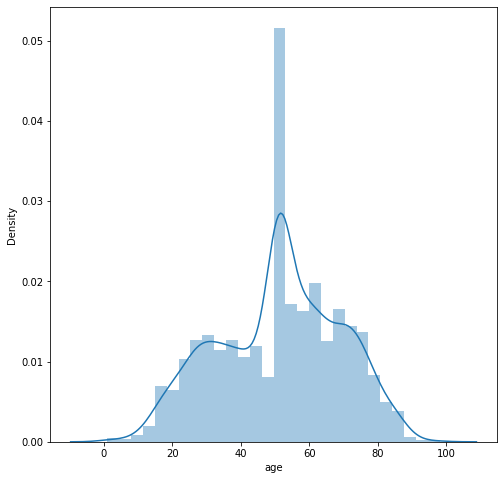

In [ ]:
#  Age Distribution
# 

plt.figure(figsize = (8,8))
sns.distplot(thyroid['age'])
plt.show()

Text(0.5, 1.0, 'Boxplot of Age')

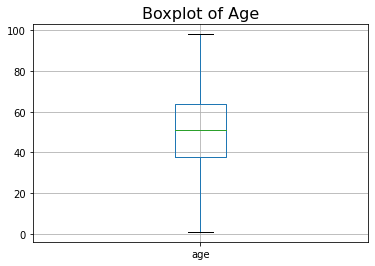

In [ ]:
#checking for outliers using a boxplot
thyroid.boxplot(column=['age'])

plt.title("Boxplot of Age",size=16)

# We can see there are no outliers in age

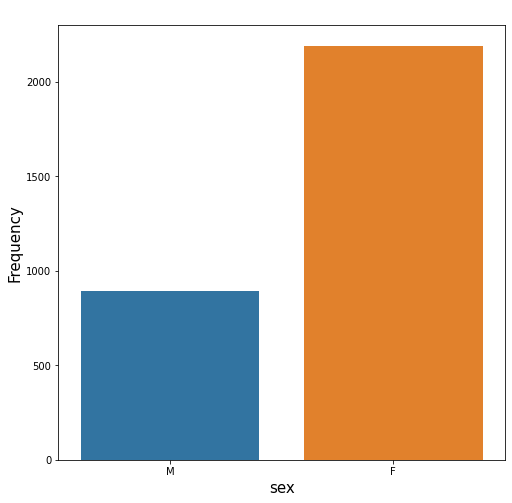

In [ ]:
#visualizing the distribution of gender in the dataset
plt.figure(figsize=(8, 8))
sns.countplot('sex',data = thyroid)
plt.xlabel("sex",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()

# This shows that females are more prone to get the disease 

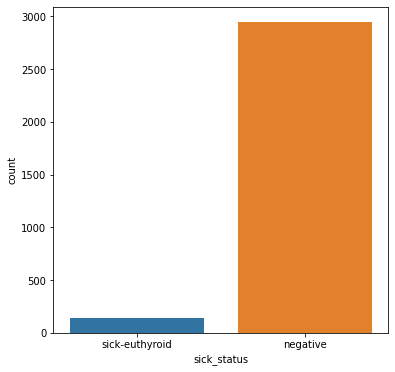

In [ ]:
# Plotting to see number of sick
# 

plt.figure(figsize = (6,6))
sns.countplot(thyroid['sick_status'])
plt.show()


# By this we can see there are large percentages of negative individuals.

sex  sick_status   
F    negative          0.952555
     sick-euthyroid    0.047445
M    negative          0.958613
     sick-euthyroid    0.041387
Name: sick_status, dtype: float64


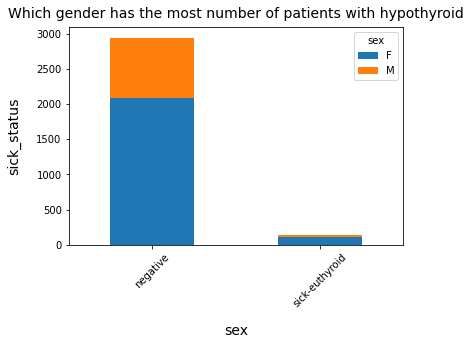

In [ ]:
# Checking which Gender more likely to have the disease 
thyroid.groupby('sex')['sick_status'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')

labels = thyroid.groupby('sex')['sick_status'].value_counts(normalize=True)
print(labels)
# # Rotating our x axis ticks
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title("Which gender has the most number of patients with hypothyroid", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("sick_status", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("sex", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()

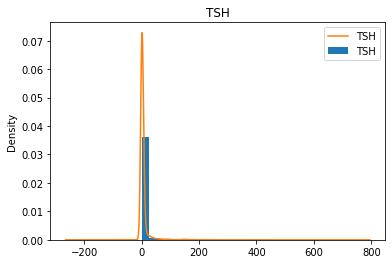

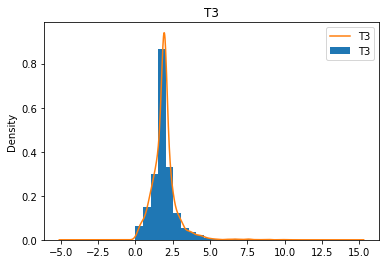

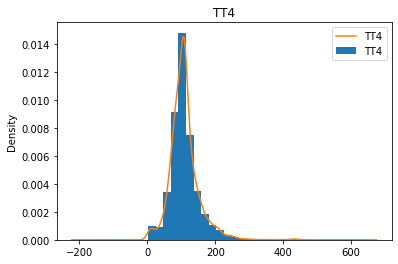

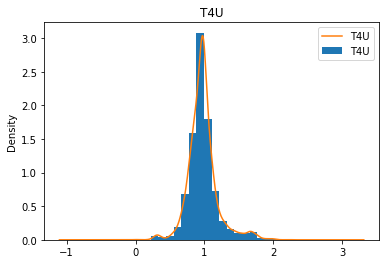

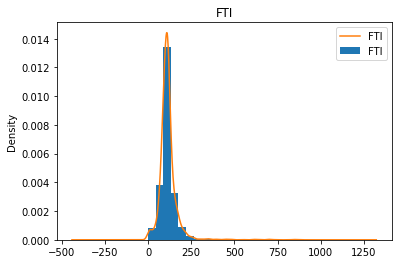

In [ ]:
# Plot a KDE for columns in dataset
for column in [ 'TSH', 'T3', 'TT4', 'T4U', 'FTI']:
    thyroid[column].plot.hist(density = True, bins = 20)
    thyroid[column].plot.kde(label = column)
    plt.title(column)
    plt.legend()
    plt.show()

#  In reviewing these histogram plots. Most of the data seems normaly distributed. The peaks within these plots display where the values are concentrated over the interval.

<Figure size 720x576 with 0 Axes>

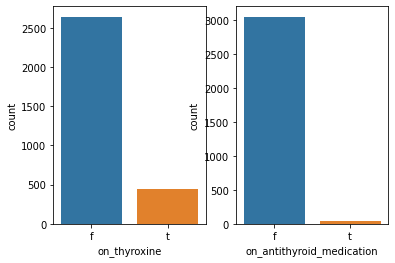

In [ ]:
# Countplot of categorical columns in the dataset
# Which are vital symptoms

plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)
sns.countplot(thyroid['on_thyroxine'], ax=ax[0])
sns.countplot(thyroid['on_antithyroid_medication'], ax=ax[1])
plt.show()

<Figure size 720x576 with 0 Axes>

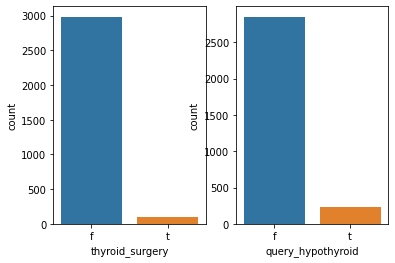

In [ ]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)

sns.countplot(thyroid['thyroid_surgery'], ax=ax[0])
sns.countplot(thyroid['query_hypothyroid'], ax=ax[1])
plt.show()

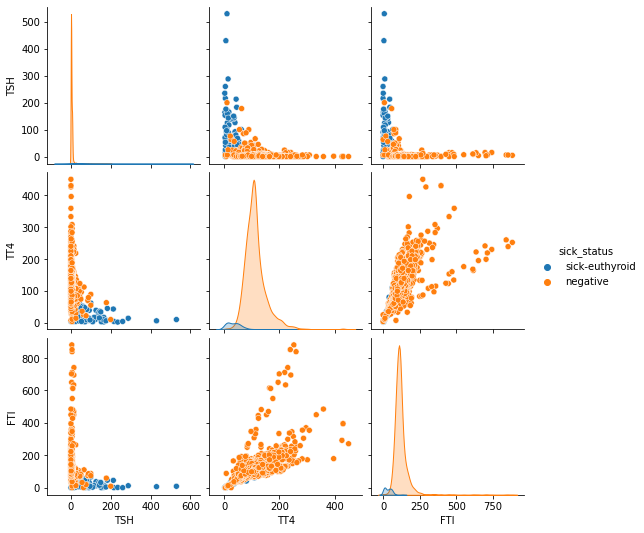

In [ ]:
# to distinguish when the condition (hpyothyroidism) is negative or postive

measure_columns = ['TSH','TT4','FTI']

sns.pairplot(thyroid, kind="scatter", vars=measure_columns, hue="sick_status")
plt.show()

### Checking Correlations and Multicollinearity
>
- We're interested in finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. One of the assumptions of a multiple linear regression model, however, is that there is no multicollinearity among the explanatory variables (i.e., they can't be predicted by other explanatory variables with high accuracy). Below, we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

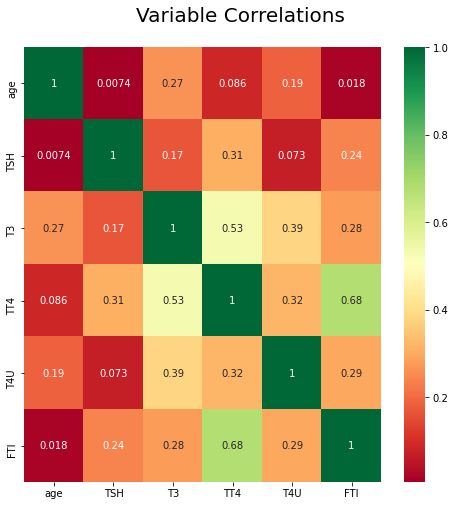

In [ ]:
corr = thyroid.corr().abs()
fig, ax=plt.subplots(figsize=(8,8))
fig.suptitle('Variable Correlations', fontsize=20, y=.95)
heatmap = sns.heatmap(corr, cmap='RdYlGn', annot=True)
heatmap
plt.show()

In [ ]:
features = []
correlations = []
for idx, correlation in corr['age'].T.iteritems():
    if correlation >= .30 and idx != 'age':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [ ]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [ ]:

print('Correlations with Age')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)
# This shows there are no multi colinear features


Correlations with Age


,Correlations,Features


Multicollinear Features


,Correlations,Features


## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# replacing values and variables

thyroid = thyroid.replace({'f' : 0, 't' : 1})
thyroid = thyroid.replace({'n' : 0, 'y' : 1})



In [ ]:
# Convert variable sex to values of 0 and 1

thyroid['sex'] = thyroid['sex'].map({'F': 0, 'M': 1})
thyroid.head(3)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,sick_status
0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,sick-euthyroid
1,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,sick-euthyroid
2,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,sick-euthyroid


## Decision trees

In [ ]:
## Step 1 : Decision Trees
# 

feat = thyroid.drop('sick_status' ,axis = 1)
feature_names = feat.columns
feature_names

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [ ]:
#  Selecting our X and y
# 

X = thyroid[feature_names ].to_numpy()
y = thyroid[ 'sick_status'].to_numpy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Pre processing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =99)

# Fitting the model
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

y_pred_train = tree.predict(X_train)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))


Prediction accuracy: 0.9995948136142626
Test accuracy: 0.9854368932038835


In [ ]:
thyroid.sick_status.nunique

<bound method IndexOpsMixin.nunique of 0       sick-euthyroid
1       sick-euthyroid
2       sick-euthyroid
3       sick-euthyroid
4       sick-euthyroid
             ...      
3158          negative
3159          negative
3160          negative
3161          negative
3162          negative
Name: sick_status, Length: 3086, dtype: object>

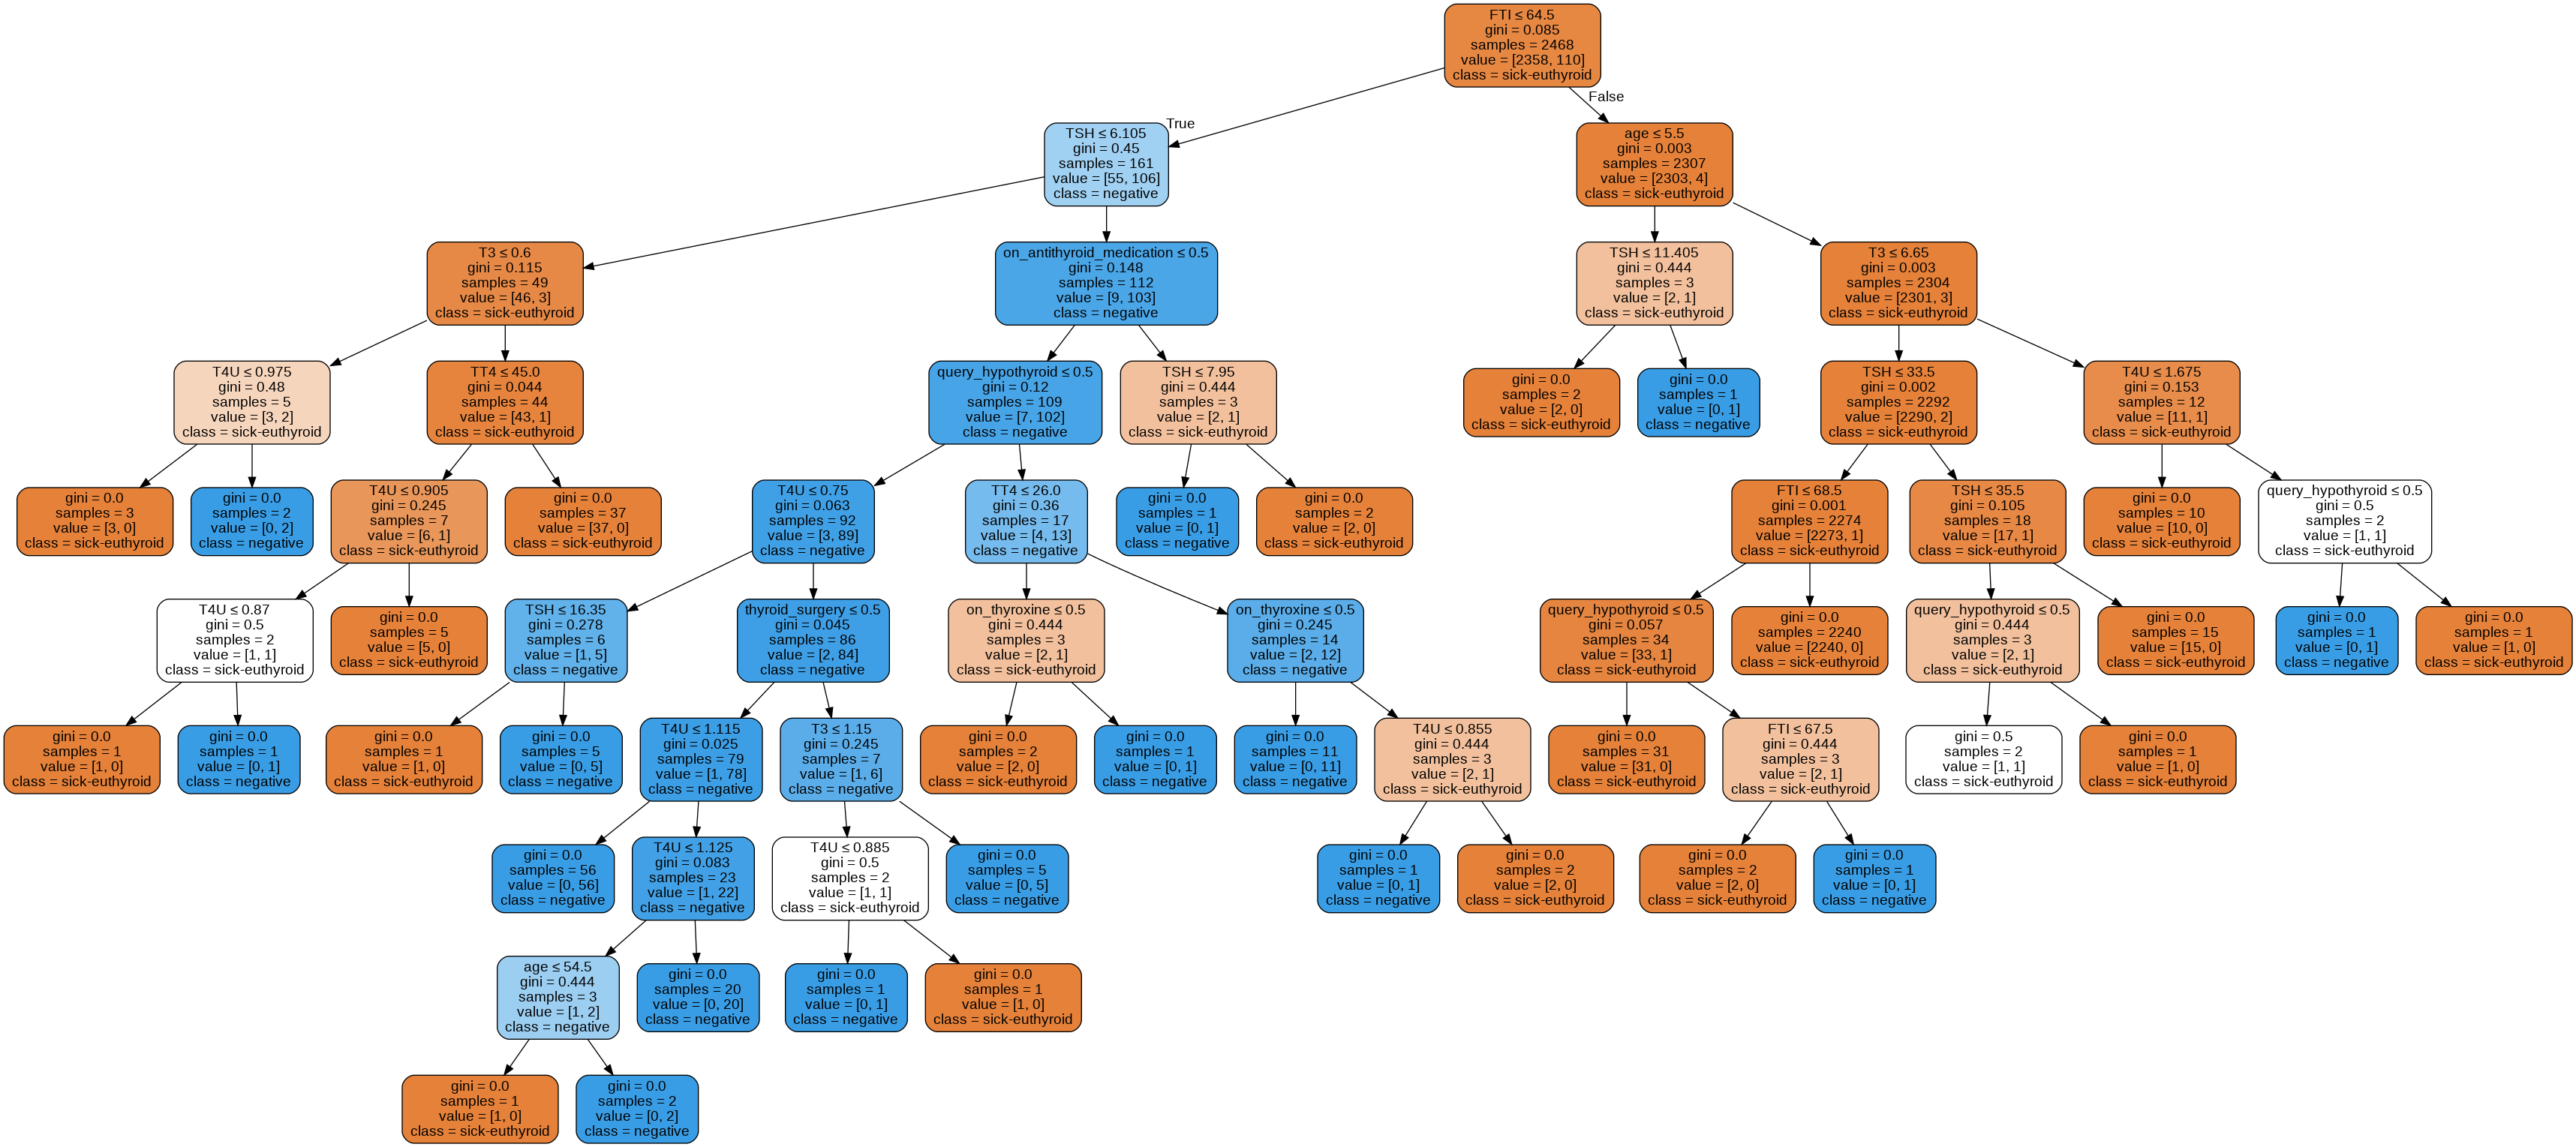

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names ,class_names=['sick-euthyroid' ,'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroid.png')
Image(graph.create_png())

In [ ]:
# Hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}

search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [ ]:
# Checking for the best parameters and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.9935206214410321


In [ ]:
# Fitting the model with the new parameters
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

y_pred_train = tree.predict(X_train)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))



Prediction accuracy: 0.9939222042139384
Test accuracy: 0.9902912621359223


### Starting with Adaboost

In [ ]:
# Starting with adaboost

from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3), 
                          n_estimators=300, random_state=20)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9995948136142626
Test accuracy: 0.9838187702265372


#### Gradient Boosting

In [ ]:
#  Gradient Boosting
# 

from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.4, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.997163695299838
Test accuracy: 0.9870550161812298


In [ ]:
# Hyper parameter tuning

param_grid = {'learning_rate': np.arange(0.1,1,0.1),
              'max_depth': [1,2,3,4,5]}

search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [ ]:
# Getting the best parameters and best score

search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.30000000000000004, 'max_depth': 1}
0.9910865343471249


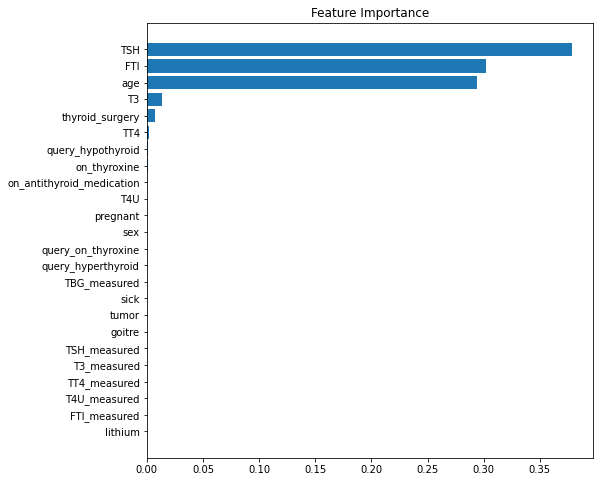

In [ ]:
# To show feature importance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.show()

### Support Vector Machine 

In [ ]:
# Importing Libraries

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

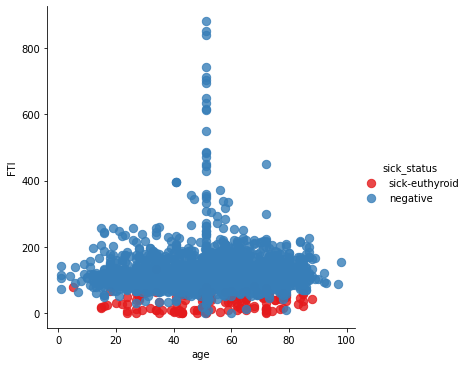

In [ ]:
sns.lmplot('age','FTI', data= thyroid, hue='sick_status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.show()

In [ ]:
thyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'sick_status'],
      dtype='object')

In [ ]:
# Convert variable sick_status values of 0 and 1
thyroid['sick_status'] = thyroid['sick_status'].map({'negative': 0, 'sick-euthyroid': 1})

In [ ]:
# splitting the data into train and test data
# Removing the target column
w = thyroid.drop(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured',  'TBG_measured'], axis=1)
y = thyroid['sick_status']
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(w)
X = pca.transform(w)
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Fitting the model: Polymomial function

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.982200647249191
[[590   3]
 [  8  17]]


### Fitting the model: Radial basis function (rbf)

In [55]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [57]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9838187702265372
[[590   3]
 [  7  18]]


### Fitting the model: Sigmoid function


In [58]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [60]:
# Model Evaluation
print(accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

0.959546925566343
[[593   0]
 [ 25   0]]


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
# We got substantial amount of accuracy now we can challenge the soln

In [61]:
# selecting X and y

feat = thyroid.drop('sick_status' ,axis = 1)
feature_names = feat.columns
feature_names

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [64]:
#  Selecting our X and y
# 

X = thyroid[feature_names ]
y = thyroid[ 'sick_status']

In [65]:
# Important Libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#### Train a Random Forest Classifier (Baseline Model)

In [67]:
!pip install Boruta

     |████████████████████████████████| 61kB 2.6MB/s 


In [68]:
from boruta import BorutaPy

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [69]:
# Apply The Full Featured Classifier To The Test Data
y_pred = forest.predict(X_test)
ac = accuracy_score(y_test, y_pred)
fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.982200647249191
Baseline Model F1 Score: 0.7755102040816326


#### Applying Boruta use NumPy array for computational and other benefits

In [70]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	0
Iteration: 	17 / 

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=40, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F152F5D6D10,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto

In [71]:
# check selected features
print("Selected Features: ", boruta_selector.support_)

# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True False]
Ranking:  [1 2]
No. of significant features:  1


In [ ]:
#  Boruta selects only one function

### Create a new subset of the data with only the selected features
- Let's create a dataset with only these features now.

In [73]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [74]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Comparison of model performance with and without feature selection

In [75]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", rf_imp_ac)
print("Limited Features Boruta Model F1 Score:", rf_imp_fscore)

Limited Features Boruta Model Accuracy: 0.970873786407767
Limited Features Boruta Model F1 Score: 0.64


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
-  Yes we did.

### b). Do we need other data to answer our question?
 - Yea there is alot of missing information.

### c). Did we have the right question?
 - Yes we did have the appropriate question
 